12.333333333333334


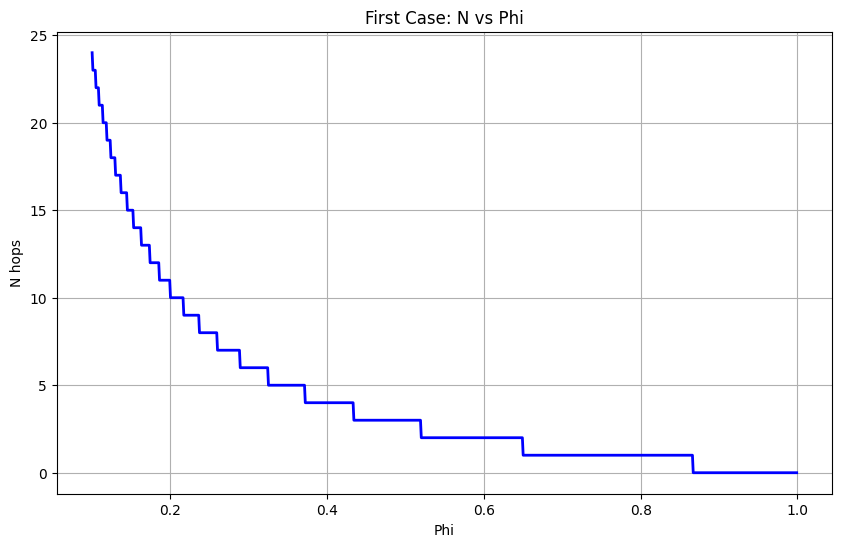

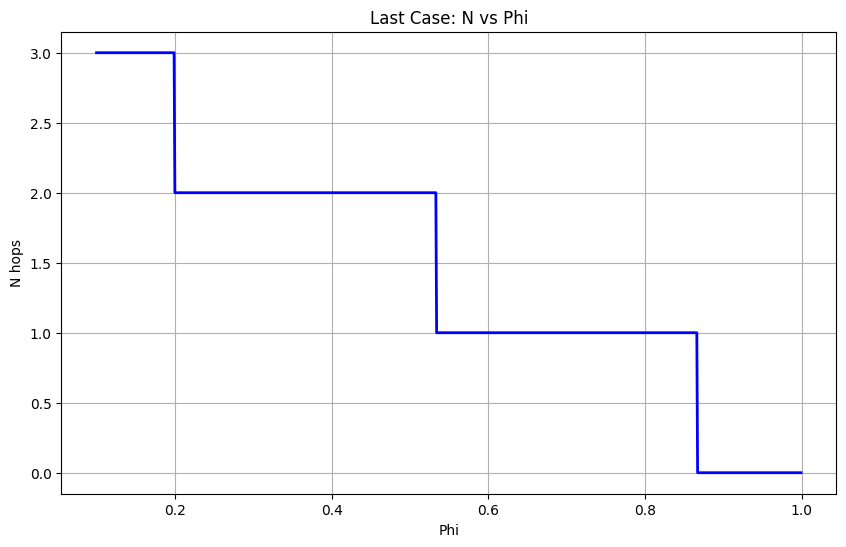

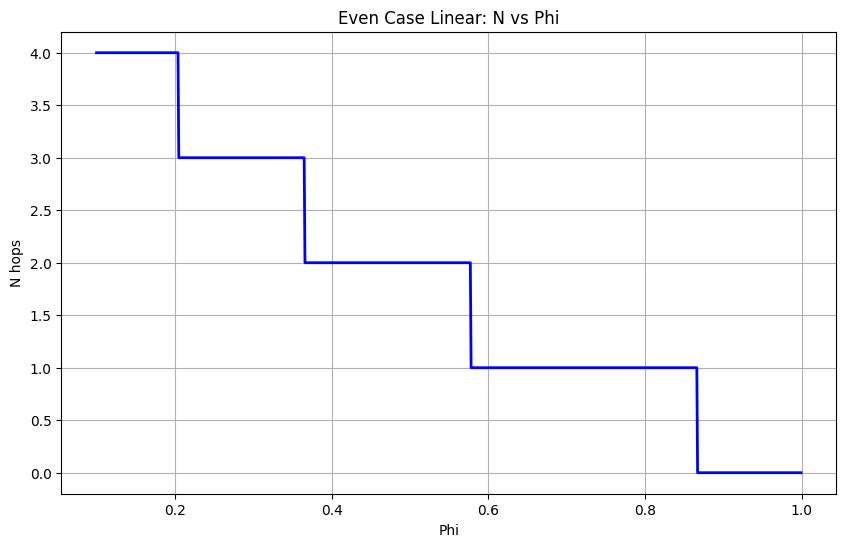

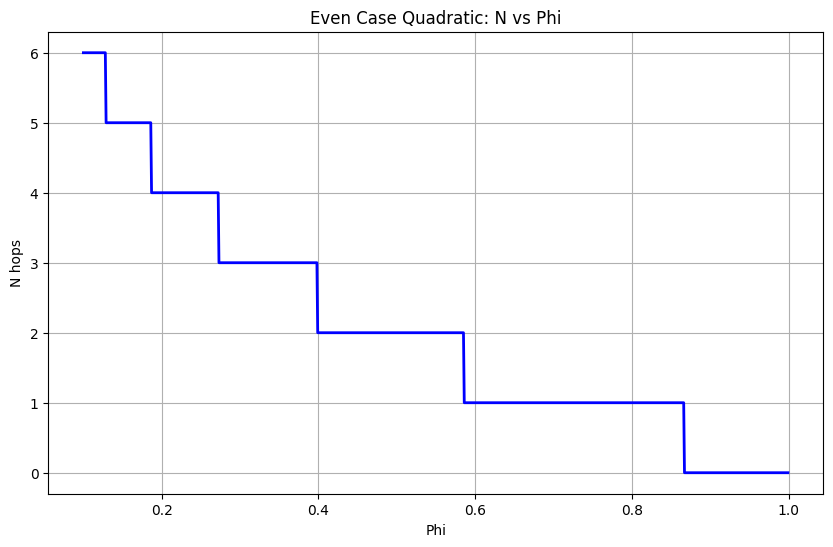

In [13]:
import math
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.pyplot import yticks, draw_all

# Your existing code
D = 100

config = {
    "base": {
        "obdh": {
            "speed": 30.0,
            "phi": 0.9,
            "energy_uptime": 1,
            "energy_io": 0.001
        },
        "ground_link": {
            "speed": 10.0,
            "energy": 5,
            "distance": 700
        }
    },
    "offloading": {
        "user_satellite": {
            "obdh": {
                "phi": None,
                "speed": None,
                "energy_uptime": None,
                "energy_io": None
            },
            "isl": {
                "speed": None,
                "energy": 3,
                "distance": 100
            }
        },
        "edge_node": {
            "edge_computer": {
                "phi": None,
                "speed": 300.0,
                "energy_uptime": 50,
                "energy_io": 0.001
            },
            "ground_link": {
                "speed": None,
                "energy": 5,
                "distance": 700
            }
        }
    }
}

sgl = config["base"]["ground_link"]["speed"]
sisl = sgl * 3
sec = config["offloading"]["edge_node"]["edge_computer"]["speed"]
phi_obdh = config["base"]["obdh"]["phi"]
sobdh = config["base"]["obdh"]["speed"]

base = D * (1/sobdh) + D * (phi_obdh/sgl)
print(base)

x = np.arange(0.1, 1, 0.001)
y_first = []
y_last = []
y_even_linear = []
y_even_quadratic = []
x_even_quadratic = []  # Store corresponding x values

for phi in x:
    value = ( (-1/sisl) - (1/sec) - ((phi-phi_obdh)/sgl) + (1/sobdh) ) * (sisl/phi) + 1
    y_first.append(math.floor(value))

for phi in x:
    value = ( (-1/sisl) - (1/sec) - ((phi-phi_obdh)/sgl) + (1/sobdh) ) * sisl + 1
    y_last.append(math.floor(value))

# Calculate y_even using the corrected formula
for phi in x:
    value = ( (((1/sobdh) + ((phi_obdh-phi)/sgl)) / ((1/sisl) + (1/sec))) - 1 ) * (2/(phi+1)) + 1
    y_even_linear.append(math.floor(value))

for phi in x:
    A = ((-1/sisl) - (1/sec) + (1/sobdh) + (phi_obdh-phi)/sgl) / ((1/sisl) + (1/sec))
    value = np.log(phi) / np.log((phi + A)/(A+1))
    y_even_quadratic.append(math.floor(value))

# Plot
plt.figure(figsize=(10, 6))
plt.plot(x, y_first, 'b-', linewidth=2)
plt.xlabel('Phi')
plt.ylabel('N hops')
plt.title('First Case: N vs Phi')
plt.grid(True)
plt.show()

# Plot
plt.figure(figsize=(10, 6))
plt.plot(x, y_last, 'b-', linewidth=2)
plt.xlabel('Phi')
plt.ylabel('N hops')
plt.title('Last Case: N vs Phi')
plt.grid(True)
plt.show()

# Plot
plt.figure(figsize=(10, 6))
plt.plot(x, y_even_linear, 'b-', linewidth=2)
plt.xlabel('Phi')
plt.ylabel('N hops')
plt.title('Even Case Linear: N vs Phi')
plt.grid(True)
plt.show()

# Plot
plt.figure(figsize=(10, 6))
plt.plot(x, y_even_quadratic, 'b-', linewidth=2)
plt.xlabel('Phi')
plt.ylabel('N hops')
plt.title('Even Case Quadratic: N vs Phi')
plt.grid(True)
plt.show()
